In [46]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load the CIFAR10 training and test datasets using TensorFlow
(train_images_raw, train_labels_raw), (test_images_raw, test_labels_raw) = tf.keras.datasets.cifar10.load_data()

# Normalize the datasets
train_images_nm = train_images_raw/255
test_images_nm = test_images_raw/255

# Define class names
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## CNN Development

/tmp/ipykernel_111/2942296152.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(train_labels_raw[i])])


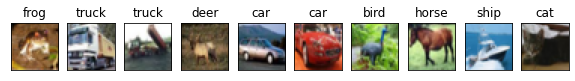

In [47]:
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([]); plt.yticks([])
    plt.imshow(train_images_nm[i])
    plt.title(class_names[int(train_labels_raw[i])])
plt.show()

In [48]:
model = models.Sequential()

# Step 1: Add a Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

In [49]:
# Step 2: Add a MaxPooling Layer
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

In [50]:
# Step 3: Add a second Conv + Pool layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

In [51]:
# Step 4: Flatten the feature maps into a vector
model.add(layers.Flatten())

In [52]:
# Step 5: Add a Dense (fully connected) layer
model.add(layers.Dense(128, activation='relu'))

In [53]:
# Step 6: Final output layer with softmax
model.add(layers.Dense(10, activation='softmax'))

In [54]:
# Final: Compile CNN Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [55]:
history = model.fit(
    train_images_nm, train_labels_raw,
    epochs=10,
    validation_data=(test_images_nm, test_labels_raw)
)

Epoch 1/10
1563/1563 [==============================] - 20s 12ms/step - loss: 1.3871 - accuracy: 0.5059 - val_loss: 1.1393 - val_accuracy: 0.5918
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0374 - accuracy: 0.6380 - val_loss: 1.0298 - val_accuracy: 0.6399
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8866 - accuracy: 0.6900 - val_loss: 0.8872 - val_accuracy: 0.6961
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7794 - accuracy: 0.7277 - val_loss: 0.8805 - val_accuracy: 0.6935
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6840 - accuracy: 0.7641 - val_loss: 0.9106 - val_accuracy: 0.6860
Epoch 6/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.6059 - accuracy: 0.7865 - val_loss: 0.8876 - val_accuracy: 0.7048
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.5264 - accuracy: 0.8182 - val_loss: 0.9017 -

## Model Result

In [56]:
# Evaluate the Model on Test Data
test_loss, test_accuracy = model.evaluate(test_images_nm, test_labels_raw, verbose=2)
print(f"\nTest accuracy: {test_accuracy:.2f}")

313/313 - 1s - loss: 1.0155 - accuracy: 0.7149 - 1s/epoch - 4ms/step

Test accuracy: 0.71


In [57]:
def predict_random_image_by_class(class_name):
    # Find the class index
    class_index = class_names.index(class_name)

    # Get all indices in the test set that match this class
    indices = [i for i, label in enumerate(test_labels_raw) if label[0] == class_index]

    # Pick one random index
    chosen_idx = random.choice(indices)

    # Get the image and true label
    image = test_images_nm[chosen_idx]
    true_label = test_labels_raw[chosen_idx][0]

    # Prepare image for prediction (add batch dimension)
    image_input = np.expand_dims(image, axis=0)
    prediction = model.predict(image_input)
    predicted_label = np.argmax(prediction[0])

    # Show the image
    plt.imshow(image)
    plt.title(f"True: {class_names[true_label]} | Predicted: {class_names[predicted_label]}")
    plt.axis('off')
    plt.show()


In [58]:
['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

['plane',
 'car',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

1/1 [==============================] - 0s 14ms/step


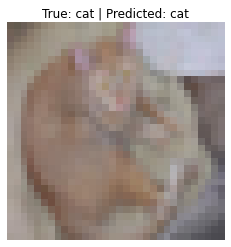

In [60]:
predict_random_image_by_class('cat') 